In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in csv file
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# choose the attributes which have numerical datatype
game_info_df=game_info_df[['average', 'yearpublished',  'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'stddev', 'avgweight','numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast',  'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt']].copy()
# drop the null rows
game_info_df.dropna(inplace=True)
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['totalvotes'] ==0].index, inplace = True)
game_info_df.head()

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,14,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Albi Polska', '...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Action Queue', 'Action Retrieval', 'Campaign...",['Gloomhaven: Assault on the Morning Star (Pro...,"['Category: Dungeon Crawler', 'Components: Min...",Vanquish monsters with strategic cardplay. Ful...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Board Game Quest Awards Best Coop Game ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Components: Map (Global Scale)', 'Game: Pand...",Mutating diseases are spreading around the wor...,/boardgame/161936/pandemic-legacy-season-1
2,224517,Brass Birmingham,2018,3,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'Arclight', 'BoardM Factory', 'Conc...",['2018 Board Game Quest Awards Best Production...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Chinese edition', 'Czech/English edition', '...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Cities: Birmingham (England)', 'Country: Eng...","Build networks, grow industries, and navigate ...",/boardgame/224517/brass-birmingham
3,167791,Terraforming Mars,2016,4,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Bru00e4dspel.se', '...",['2016 Board Game Quest Awards Best Strategy/E...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Chin...","['Drafting', 'End Game Bonuses', 'Hand Managem...",['French Championship Promo Cards (fan expansi...,"['Components: Map (Global Scale)', 'Components...",Compete with rival CEOs to make Mars habitable...,/boardgame/167791/terraforming-mars
4,233078,Twilight Imperium Fourth Edition,2017,5,3,6,240,480,14,6.0,...,['Scott Schomburg'],"['Fantasy Flight Games', 'ADC Blackfire Entert...",['2017 Golden Geek Best Strategy Board Game No...,"['Civilization', 'Economic', 'Exploration', 'N...","['Chinese edition', 'Czech edition', 'English ...","['Action Drafting', 'Area Majority / Influence...",['Twilight Imperium: Fourth Edition u2013 Prop...,"['Components: Hexagonal Tiles', 'Components: M...","Build an intergalactic empire through trade, r...",/boardgame/233078/twilight-imperium-fourth-edi...


In [4]:
# Get the general idea about the dataset value range
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average,19316.0,6.448354,0.923534,1.0,5.885825,6.48070,7.063608,9.5
yearpublished,19316.0,1984.922189,203.982472,-3500.0,1998.000000,2010.00000,2016.000000,2022.0
minplayers,19316.0,2.008128,0.676124,1.0,2.000000,2.00000,2.000000,10.0
maxplayers,19316.0,5.440930,13.146152,1.0,4.000000,4.00000,6.000000,999.0
minplaytime,19316.0,69.816007,472.459600,1.0,20.000000,37.00000,60.000000,60000.0
maxplaytime,19316.0,96.815749,558.755905,1.0,30.000000,45.00000,90.000000,60000.0
minage,19316.0,9.688704,3.611765,0.0,8.000000,10.00000,12.000000,25.0
totalvotes,19316.0,17.054670,67.723891,1.0,2.000000,4.00000,9.000000,2108.0
languagedependence,19316.0,1.669704,1.373367,0.0,1.000000,1.00000,3.000000,5.0
usersrated,19316.0,923.496946,3721.562843,1.0,57.000000,139.00000,449.000000,104891.0


## Select features, Create Train Test Split, Scale the data

In [5]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)
X.shape, y.shape

((19316, 32), (19316,))

In [6]:
feature_names=X.columns
feature_names

Index(['yearpublished', 'minplayers', 'maxplayers', 'minplaytime',
       'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'stddev', 'avgweight', 'numweights', 'numgeeklists',
       'numtrading', 'numwanting', 'numcomments', 'siteviews', 'numplays',
       'numplays_month', 'news', 'blogs', 'weblink', 'podcast',
       'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt'],
      dtype='object')

In [7]:
# Create a Train Test Split (20/80)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.2,random_state=101)
X_train.shape, y_train.shape

((3863, 32), (3863,))

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Perform feature selection

In [9]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test):.5f}")

Training Data Score: 0.95452
Testing Data Score: 0.66331


In [10]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
rf_feature_importance

[(0.2987575691188217, 'numwanting'),
 (0.14948856211111122, 'avgweight'),
 (0.12912267745358524, 'yearpublished'),
 (0.06369662364217973, 'stddev'),
 (0.049999977951069356, 'numtrading'),
 (0.03556633646032022, 'numplays'),
 (0.028658613270599938, 'numgeeklists'),
 (0.025261473976277895, 'siteviews'),
 (0.02194572827086515, 'usersrated'),
 (0.015183455843229898, 'numcomments'),
 (0.01486340941478702, 'maxplaytime'),
 (0.014592156591121553, 'maxplayers'),
 (0.012931169174685538, 'boardgamefamily_cnt'),
 (0.012174946896888184, 'minage'),
 (0.01208254697560964, 'totalvotes'),
 (0.011738514454653638, 'numweights'),
 (0.01053215476655107, 'weblink'),
 (0.009968986704438092, 'boardgamemechanic_cnt'),
 (0.009416681105436914, 'boardgameversion_cnt'),
 (0.009194793127218631, 'minplaytime'),
 (0.008888497116551123, 'boardgameexpansion_cnt'),
 (0.008795496014324134, 'blogs'),
 (0.008630570304902059, 'boardgamecategory_cnt'),
 (0.008523286212329185, 'languagedependence'),
 (0.006024719661464445, '

<ipython-input-11-26b91edf87d9>:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance])


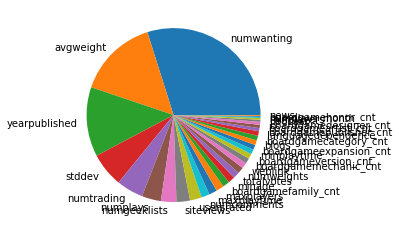

In [11]:
plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance])
plt.show()

In [12]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train_scaled, y_train)
dtr.score(X_train_scaled, y_train)
print(f"Training Data Score: {dtr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dtr.score(X_test_scaled, y_test):.5f}")

Training Data Score: 1.00000
Testing Data Score: 0.27629


In [13]:
importances = dtr.feature_importances_
dtr_feature_importance=sorted(zip(importances, feature_names), reverse=True)
dtr_feature_importance

[(0.3000585235934758, 'numwanting'),
 (0.14777084223843365, 'avgweight'),
 (0.13127231914763546, 'yearpublished'),
 (0.06082056724535706, 'stddev'),
 (0.04993455090083751, 'numtrading'),
 (0.031560072577711436, 'numplays'),
 (0.031182651602178858, 'numgeeklists'),
 (0.026274418711359496, 'usersrated'),
 (0.02609946960966564, 'siteviews'),
 (0.022741216621670474, 'maxplayers'),
 (0.02137400979246238, 'numcomments'),
 (0.01279897374045582, 'minage'),
 (0.01202952970984086, 'totalvotes'),
 (0.01166914617836133, 'numweights'),
 (0.011528675721217317, 'minplaytime'),
 (0.01023333386061547, 'boardgameexpansion_cnt'),
 (0.009872960766686081, 'boardgamefamily_cnt'),
 (0.009545601686172838, 'boardgameversion_cnt'),
 (0.009439041395627613, 'maxplaytime'),
 (0.00848643746151156, 'boardgamecategory_cnt'),
 (0.007391818143383061, 'boardgamemechanic_cnt'),
 (0.006984739016669407, 'languagedependence'),
 (0.006970995518160344, 'blogs'),
 (0.006037564887059533, 'weblink'),
 (0.005362608076143083, 'boa

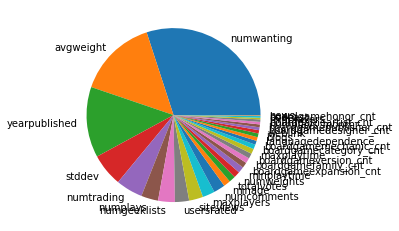

In [14]:
plt.pie([a[0] for a in dtr_feature_importance],labels=[a[1] for a in dtr_feature_importance])
plt.show()

k: 1, Train/Test Score: 1.000/-0.149
k: 3, Train/Test Score: 0.639/0.237
k: 5, Train/Test Score: 0.558/0.308
k: 7, Train/Test Score: 0.523/0.334
k: 9, Train/Test Score: 0.500/0.348
k: 11, Train/Test Score: 0.486/0.356
k: 13, Train/Test Score: 0.471/0.362
k: 15, Train/Test Score: 0.459/0.365
k: 17, Train/Test Score: 0.452/0.366
k: 19, Train/Test Score: 0.443/0.368
k: 21, Train/Test Score: 0.438/0.370
k: 23, Train/Test Score: 0.432/0.370
k: 25, Train/Test Score: 0.427/0.370
k: 27, Train/Test Score: 0.423/0.370
k: 29, Train/Test Score: 0.422/0.370


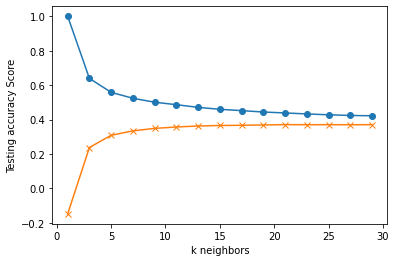

In [15]:
from sklearn.neighbors import KNeighborsRegressor
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train_scaled, y_train)
    train_score = knr.score(X_train_scaled, y_train)
    test_score = knr.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr = dummy_regr.fit(X_train_scaled, y_train)
print(f"Training Data Score: {dummy_regr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dummy_regr.score(X_test_scaled, y_test):.5f}")

Training Data Score: 0.00000
Testing Data Score: -0.00033


In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train_scaled, y_train)
print(f"Training Data Score: {gpr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {gpr.score(X_test_scaled, y_test):.5f}")

Training Data Score: 0.39768
Testing Data Score: 0.39402
